<a href="https://colab.research.google.com/github/Pramuuu/Futurense_ML/blob/main/11_07_2024_Data_cleaning_p_loan1_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solving problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title

In [ ]:
# importing requirement sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss

In [ ]:
data = pd.read_csv('/content/Loan 1.csv')
df = pd.DataFrame(data)
df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,...,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778
19996,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,...,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95
19997,C-46479,Karlyn Mckinzie,M,19,2252.03,Low,Working,Core staff,Semi-Urban,18629.88,...,1.0,656.46,0,Inactive,270,2252.03,2,Rural,0,21566.27
19998,C-3099,Mariana Pulver,F,21,1845.35,Low,Working,NaN,Semi-Urban,95430.73,...,2.0,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1,120281.17


In [ ]:
df.head()


,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       19969 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 19250 non-null  float64
 5   Income Stability             19187 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           15311 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount Request (USD)    20000 non-null  float64
 10  Current Loan Expenses (USD)  19917 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  Dependents      

In [ ]:
df.isna().sum().to_frame().T
#checking missing values

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,0,0,31,0,750,813,0,4689,0,0,...,1142,743,0,1076,0,892,0,160,0,0


In [ ]:
# check invalid valuse
for col in df:
    print(f"{col} has {df[col].nunique()} unique value")

Customer ID has 20000 unique value
Name has 20000 unique value
Gender has 2 unique value
Age has 48 unique value
Income (USD) has 18693 unique value
Income Stability has 2 unique value
Profession has 7 unique value
Type of Employment has 18 unique value
Location has 3 unique value
Loan Amount Request (USD) has 19988 unique value
Current Loan Expenses (USD) has 17247 unique value
Expense Type 1 has 2 unique value
Expense Type 2 has 2 unique value
Dependents has 10 unique value
Credit Score has 13756 unique value
No. of Defaults has 2 unique value
Has Active Credit Card has 3 unique value
Property ID has 999 unique value
Property Age has 18560 unique value
Property Type has 4 unique value
Property Location has 3 unique value
Co-Applicant has 3 unique value
Property Price has 19824 unique value


In [ ]:
# now check duplicated data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Length: 20000, dtype: bool

In [ ]:
# Check value counts of column that appear categorical accoring to above results
discrete_cols1 = ['Customer ID','Name','Gender','Income Stability']
for col in discrete_cols1:
    print(f"{col}:\n{df[col].value_counts()}")
    print('-' * 50)

Customer ID:
Customer ID
C-26247    1
C-40981    1
C-35757    1
C-16255    1
C-33950    1
          ..
C-26367    1
C-17794    1
C-25199    1
C-32646    1
C-43482    1
Name: count, Length: 20000, dtype: int64
--------------------------------------------------
Name:
Name
Tandra Olszewski       1
Meghan Afanador        1
Nilda Ames             1
Nicki Arviso           1
Christiana Domenech    1
                      ..
Nolan Bumbalough       1
Marquerite Snelling    1
Sol Coggin             1
Kathey Corkill         1
Mechelle Boddie        1
Name: count, Length: 20000, dtype: int64
--------------------------------------------------
Gender:
Gender
F    10142
M     9827
Name: count, dtype: int64
--------------------------------------------------
Income Stability:
Income Stability
Low     17501
High     1686
Name: count, dtype: int64
--------------------------------------------------


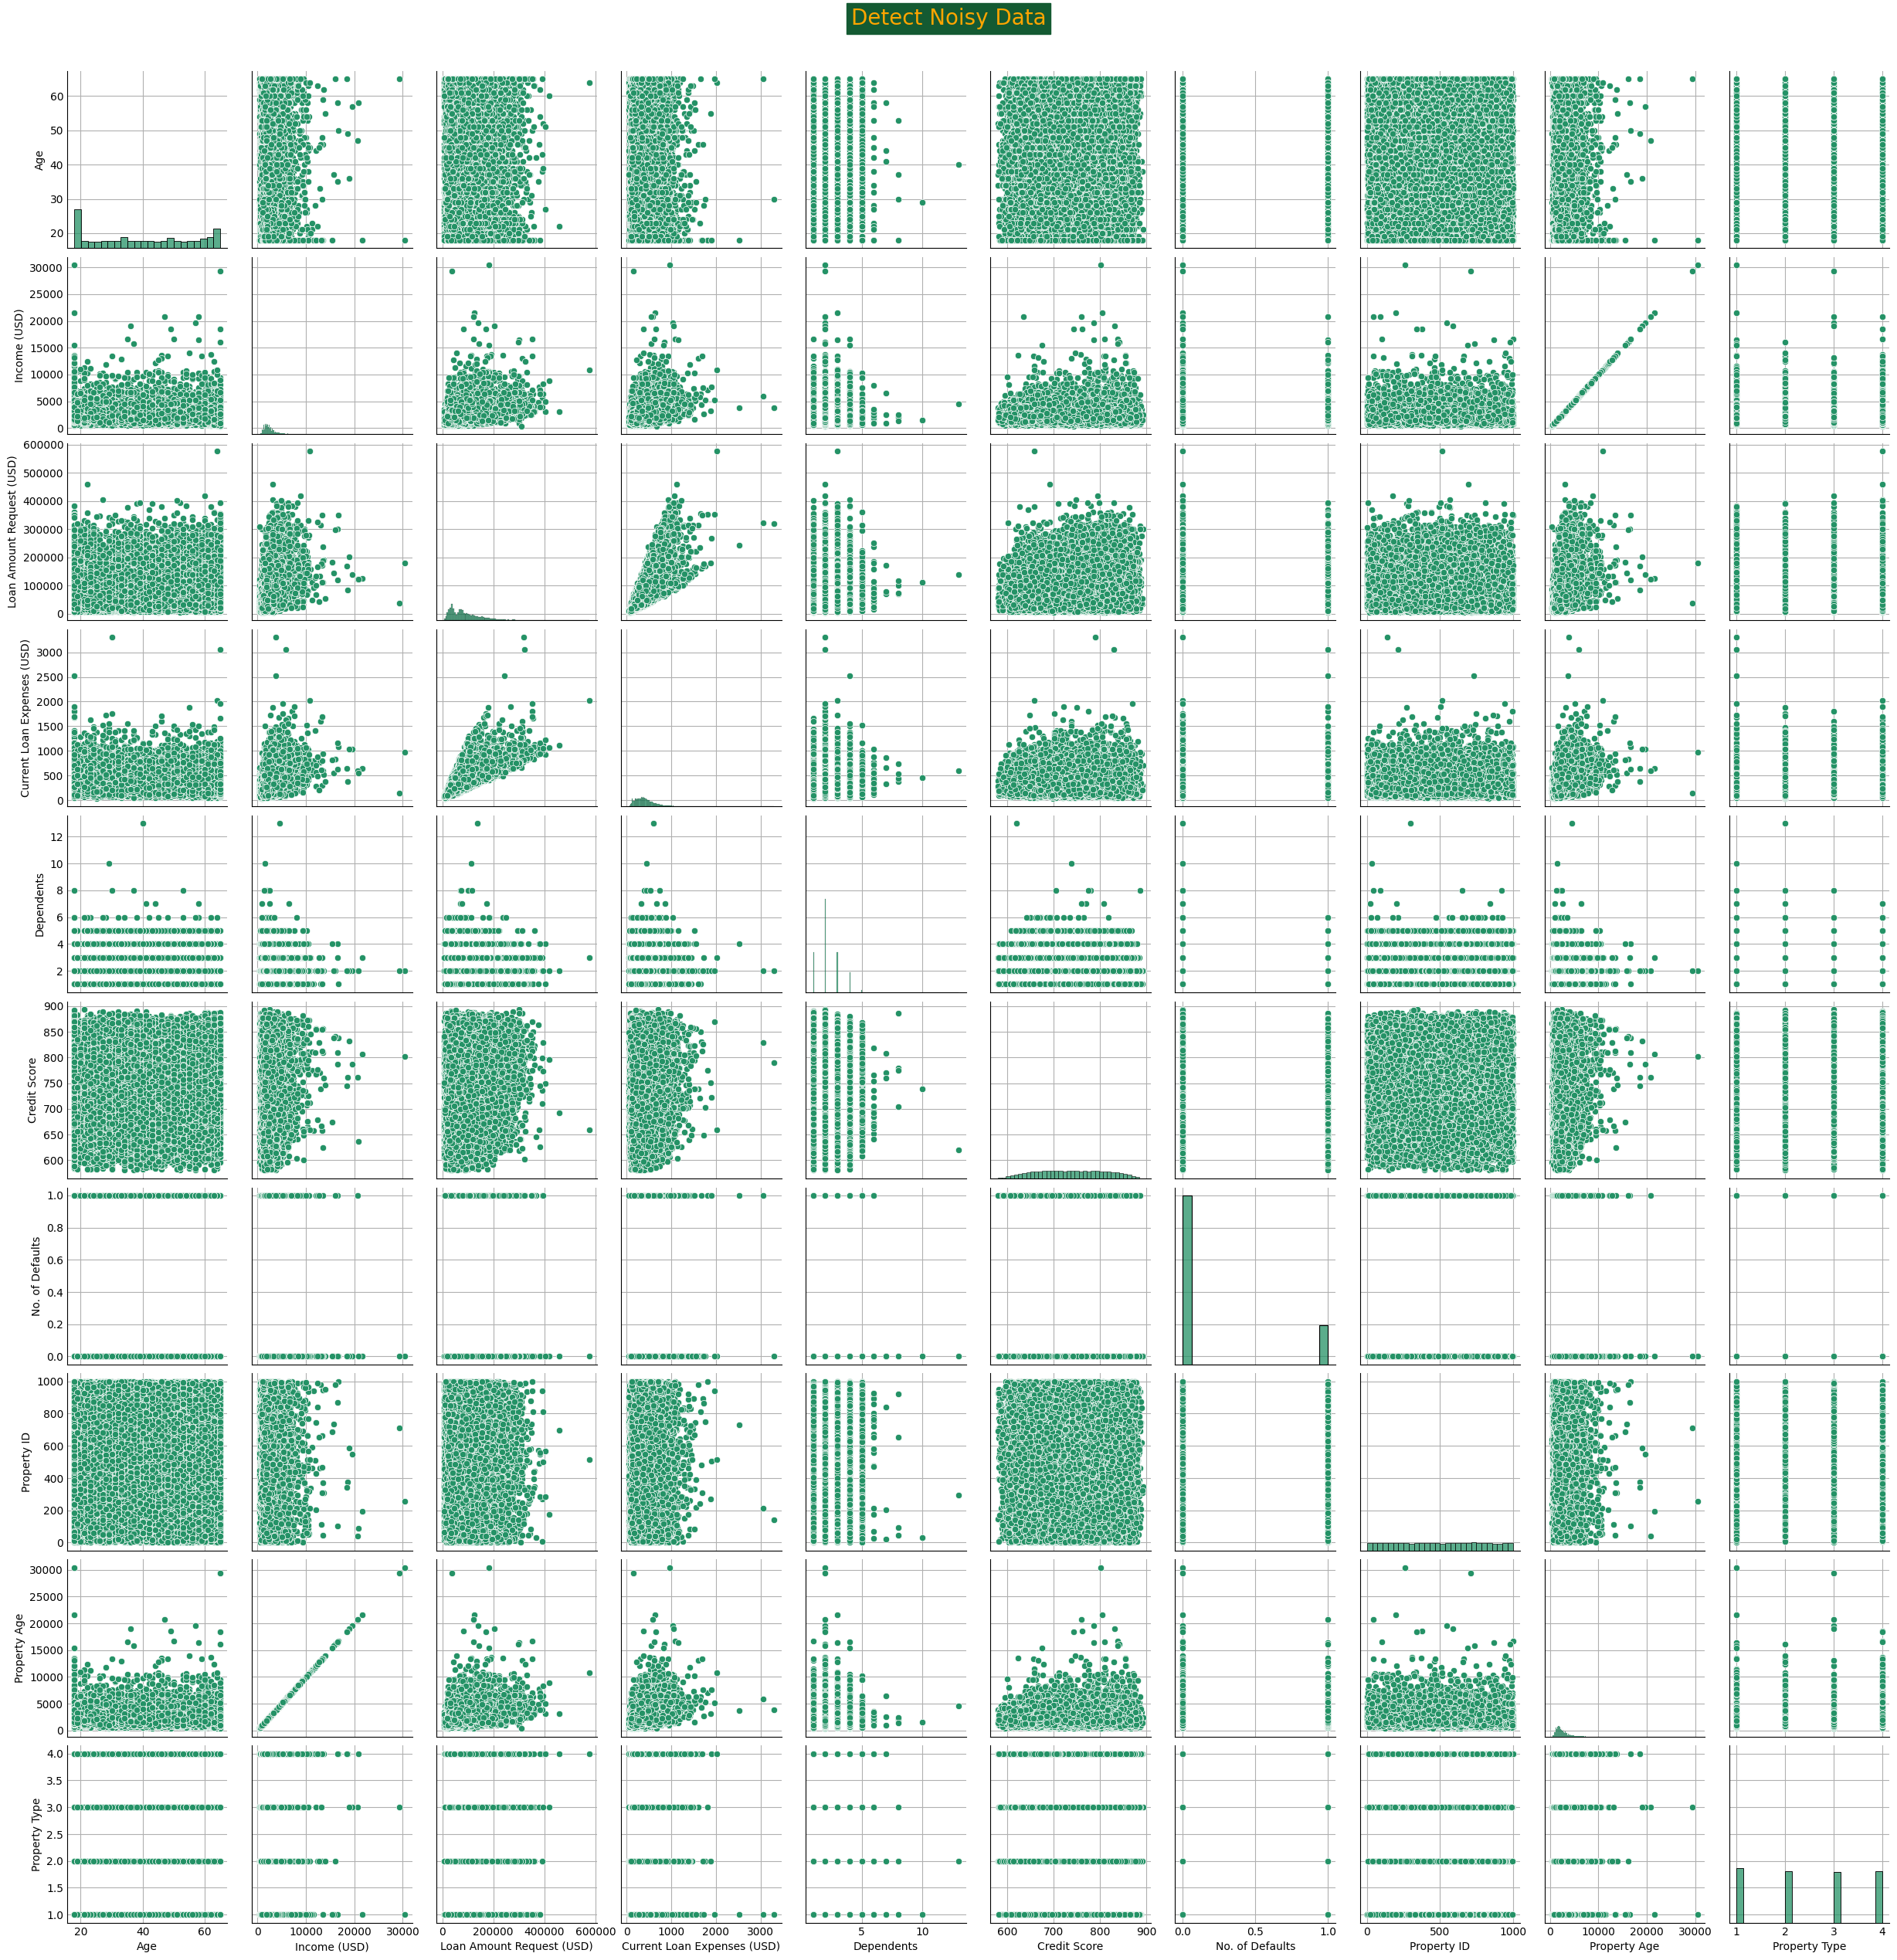

In [ ]:
# check noisy data
%matplotlib inline
sns.set_palette('summer')
dnp = sns.pairplot(df.loc[:, ~df.columns.isin(discrete_cols1)])
dnp.fig.suptitle('Detect Noisy Data', y=1.02, **FONT)

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/Loan 1.csv')
df = pd.DataFrame(data)
df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,...,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778
19996,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,...,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95
19997,C-46479,Karlyn Mckinzie,M,19,2252.03,Low,Working,Core staff,Semi-Urban,18629.88,...,1.0,656.46,0,Inactive,270,2252.03,2,Rural,0,21566.27
19998,C-3099,Mariana Pulver,F,21,1845.35,Low,Working,NaN,Semi-Urban,95430.73,...,2.0,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1,120281.17


In [ ]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(23)

Your selected dataframe has 23 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
Type of Employment,4689,23.4
Dependents,1142,5.7
Has Active Credit Card,1076,5.4
Property Age,892,4.5
Income Stability,813,4.1
Income (USD),750,3.8
Credit Score,743,3.7
Property Location,160,0.8
Current Loan Expenses (USD),83,0.4
Gender,31,0.2


In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Number of each type of column
df.dtypes.value_counts()

object     13
float64     6
int64       4
Name: count, dtype: int64

In [ ]:
# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Customer ID               20000
Name                      20000
Gender                        2
Income Stability              2
Profession                    7
Type of Employment           18
Location                      3
Expense Type 1                2
Expense Type 2                2
Has Active Credit Card        3
Property Location             3
Co-Applicant                  3
Property Price            19824
dtype: int64

In [ ]:
#To check number of uniqe elements in each columns.
df.nunique()

Customer ID                    20000
Name                           20000
Gender                             2
Age                               48
Income (USD)                   18693
Income Stability                   2
Profession                         7
Type of Employment                18
Location                           3
Loan Amount Request (USD)      19988
Current Loan Expenses (USD)    17247
Expense Type 1                     2
Expense Type 2                     2
Dependents                        10
Credit Score                   13756
No. of Defaults                    2
Has Active Credit Card             3
Property ID                      999
Property Age                   18560
Property Type                      4
Property Location                  3
Co-Applicant                       3
Property Price                 19824
dtype: int64

In [ ]:
# Check for duplicate Customer IDs
duplicate_customer_ids = data['Customer ID'].duplicated().sum()
if duplicate_customer_ids > 0:
    print(f'There are {duplicate_customer_ids} duplicate Customer IDs.')
else:
    print('There are no duplicate Customer IDs.')

There are no duplicate Customer IDs.


In [ ]:
# Check for missing values in the Customer ID column
missing_customer_ids = data['Customer ID'].isnull().sum()

if missing_customer_ids > 0:
    print(f'There are {missing_customer_ids} missing Customer IDs.')
else:
    print('There are no missing Customer IDs.')

There are no missing Customer IDs.


In [ ]:
missing_names = data['Name'].isnull().sum()

if missing_names > 0:
    print(f'There are {missing_names} missing names.')
else:
    print('There are no missing names.')

There are no missing names.


In [ ]:
# Check for duplicate values in the Name column
duplicate_names = data['Name'].duplicated().sum()

if duplicate_names > 0:
    print(f'There are {duplicate_names} duplicate names.')
else:
    print('There are no duplicate names.')

There are no duplicate names.


In [ ]:
# Get unique values and their counts in the Gender column
unique_genders = data['Gender'].value_counts(dropna=False)
# Print the number of unique values
num_unique_genders = unique_genders.size
print(f'There are {num_unique_genders} unique values in the Gender column.')

There are 3 unique values in the Gender column.


In [ ]:
# Print the counts of each unique value
print('Counts of each unique value in the Gender column:')
print(unique_genders)

Counts of each unique value in the Gender column:
Gender
F      10142
M       9827
NaN       31
Name: count, dtype: int64


In [ ]:
null_values = df['Gender'].isnull().sum()
print(f"Number of missing values in 'Gender' column: {null_values}")

Number of missing values in 'Gender' column: 31


In [ ]:
df['Gender'].fillna('Other', inplace=True)
print(df)

      Customer ID              Name Gender  Age  Income (USD)  \
0         C-26247  Tandra Olszewski      F   47       3472.69   
1         C-35067     Jeannette Cha      F   57       1184.84   
2         C-34590      Keva Godfrey      F   52       1266.27   
3         C-16668      Elva Sackett      M   65       1369.72   
4         C-12196    Sade Constable      F   60       1939.23   
...           ...               ...    ...  ...           ...   
19995      C-9076    Tobias Davilla      F   19       1349.60   
19996     C-17587    Evelina Hodges      M   22       2019.78   
19997     C-46479   Karlyn Mckinzie      M   19       2252.03   
19998      C-3099    Mariana Pulver      F   21       1845.35   
19999     C-43482   Mechelle Boddie      M   21       5233.16   

      Income Stability            Profession Type of Employment    Location  \
0                  Low  Commercial associate           Managers  Semi-Urban   
1                  Low               Working        Sales sta

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Calculate Z-score
df['age_zscore'] = np.abs((df['age'] - df['age'].mean()) / df['age'].std())

In [ ]:
null_values = df['Age'].isnull().sum()
print(f"Number of missing values in 'Age' column: {null_values}")

Number of missing values in 'Age' column: 0


In [ ]:
# Get unique values and their counts in the Age column
unique_age = data['Age'].value_counts(dropna=False)
# Print the number of unique values
num_unique_age = unique_age.size
print(f'There are {num_unique_age} unique values in the Age column.')

There are 48 unique values in the Age column.


In [ ]:
# Print the counts of each unique value
print('Counts of each unique value in the Age column:')
print(unique_age)

Counts of each unique value in the Age column:
Age
18    3045
65     864
61     538
60     535
63     525
64     514
62     503
33     366
38     365
47     362
19     360
22     358
42     357
58     355
36     346
34     346
55     346
41     346
27     344
51     342
49     340
59     340
30     330
32     328
25     328
57     328
35     327
31     326
46     325
52     325
45     325
37     321
29     320
28     319
53     318
23     316
21     314
48     312
40     310
26     310
56     309
54     307
20     307
43     304
50     303
39     302
44     295
24     294
Name: count, dtype: int64


In [ ]:
df['age_zscore'] = np.abs((df['Age'] - df['Age'].mean()) / df['Age'].std())
#threshold for outliers
threshold = 3
outliers = df[df['age_zscore'] > threshold]
print("Outliers detected using Z-score:")
print(outliers)

Outliers detected using Z-score:
Empty DataFrame
Columns: [Customer ID, Name, Gender, Age, Income (USD), Income Stability, Profession, Type of Employment, Location, Loan Amount Request (USD), Current Loan Expenses (USD), Expense Type 1, Expense Type 2, Dependents, Credit Score, No. of Defaults, Has Active Credit Card, Property ID, Property Age, Property Type, Property Location, Co-Applicant, Property Price, age_zscore]
Index: []

[0 rows x 24 columns]


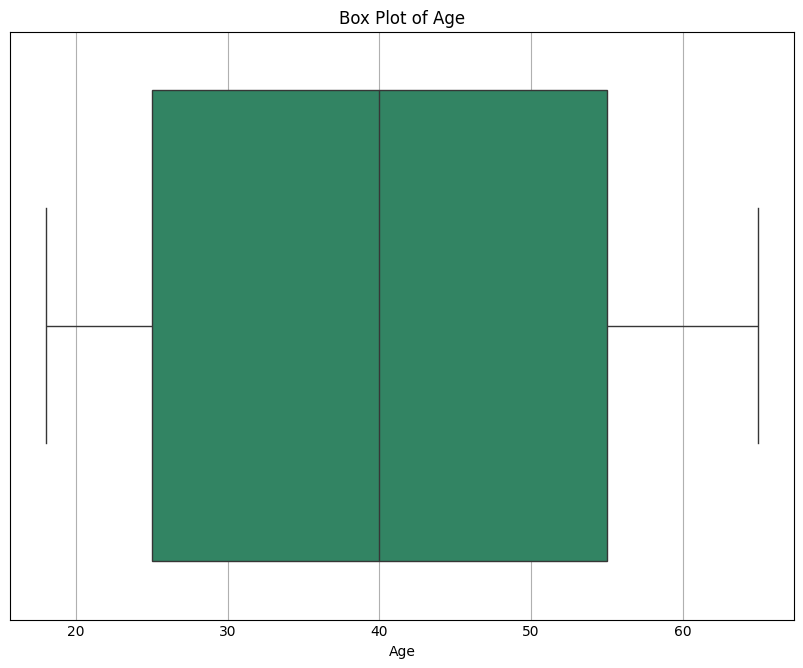

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.show()

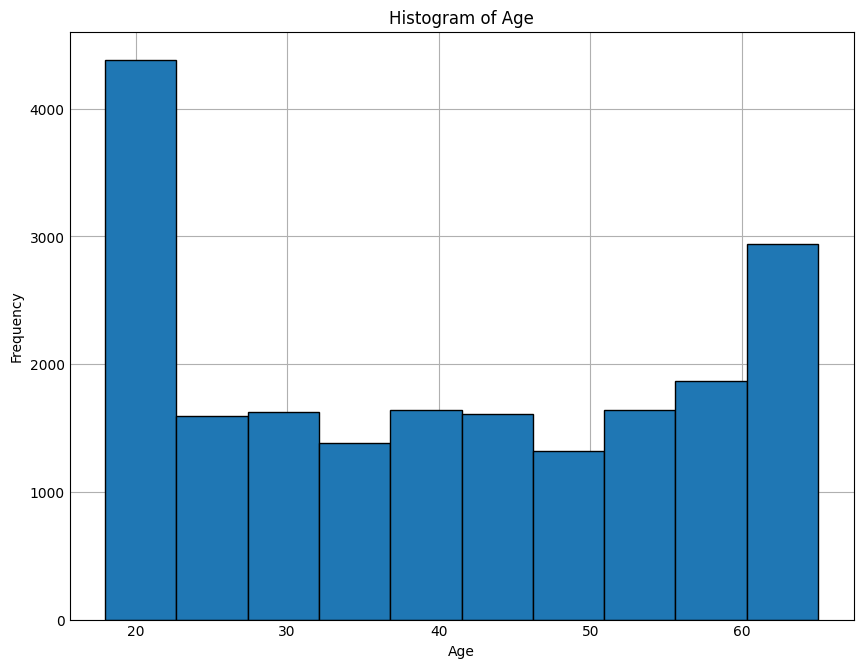

In [ ]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


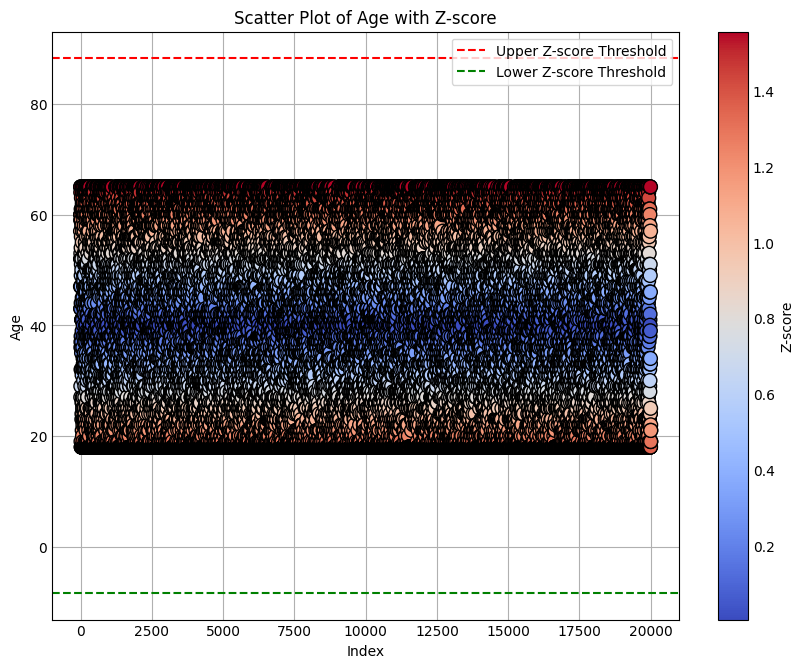

In [ ]:
# Calculate Z-score
df['age_zscore'] = np.abs((df['Age'] - df['Age'].mean()) / df['Age'].std())

# Scatter plot with Z-score threshold
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Age'], c=df['age_zscore'], cmap='coolwarm', edgecolor='k', s=100)
plt.axhline(y=df['Age'].mean() + 3 * df['Age'].std(), color='r', linestyle='--', label='Upper Z-score Threshold')
plt.axhline(y=df['Age'].mean() - 3 * df['Age'].std(), color='g', linestyle='--', label='Lower Z-score Threshold')
plt.colorbar(label='Z-score')
plt.xlabel('Index')
plt.ylabel('Age')
plt.title('Scatter Plot of Age with Z-score')
plt.legend()
plt.show()

In [ ]:
# Calculating Interquartile Range (IQR)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
# Defining lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identifing outliers
outliers_iqr = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print("Outliers detected using IQR:")
print(outliers_iqr)

Outliers detected using IQR:
Empty DataFrame
Columns: [Customer ID, Name, Gender, Age, Income (USD), Income Stability, Profession, Type of Employment, Location, Loan Amount Request (USD), Current Loan Expenses (USD), Expense Type 1, Expense Type 2, Dependents, Credit Score, No. of Defaults, Has Active Credit Card, Property ID, Property Age, Property Type, Property Location, Co-Applicant, Property Price, Income_zscore]
Index: []

[0 rows x 24 columns]


Outliers before removing missing values


In [ ]:
# Check for missing values in the Customer ID column
missing_Income = data['Income (USD)'].isnull().sum()

if missing_Income > 0:
    print(f'There are {missing_Income} missing Income.')
else:
    print('There are no missing Income.')

There are 750 missing Income.


In [ ]:
# Get unique values and their counts in the Income column
unique_Income = data['Income (USD)'].value_counts(dropna=False)
# Print the number of unique values
num_unique_Income = unique_Income.size
print(f'There are {num_unique_Income} unique values in the Income column.')

There are 18694 unique values in the Income column.


In [ ]:
df['Income_zscore'] = np.abs((df['Income (USD)'] - df['Income (USD)'].mean()) / df['Income (USD)'].std())
#threshold for outliers
threshold = 3
outliers = df[df['Income_zscore'] > threshold]
print("Outliers detected using Z-score:")
print(outliers)

Outliers detected using Z-score:
      Customer ID                   Name Gender  Age  Income (USD)  \
81        C-24776         Herbert Rippel      F   36       8666.14   
160        C-3997         Danica Lindsey      F   64       8369.46   
364       C-33801          Sonya Liechty      M   53      10365.44   
369       C-35271              Azzie Rio      M   61       6929.25   
422        C-7342  Carmina Killingsworth      M   18      10494.65   
...           ...                    ...    ...  ...           ...   
19656      C-7279           Bette Meadow      F   35       8228.49   
19678      C-8922         Billye Liechty      F   41       7750.53   
19786     C-27812      Antonietta Simons      F   39       8270.93   
19790     C-11433          America Moats      F   63       8414.09   
19815     C-25533           Krystin Duda      M   32       6963.10   

      Income Stability            Profession     Type of Employment  \
81                 Low               Working           

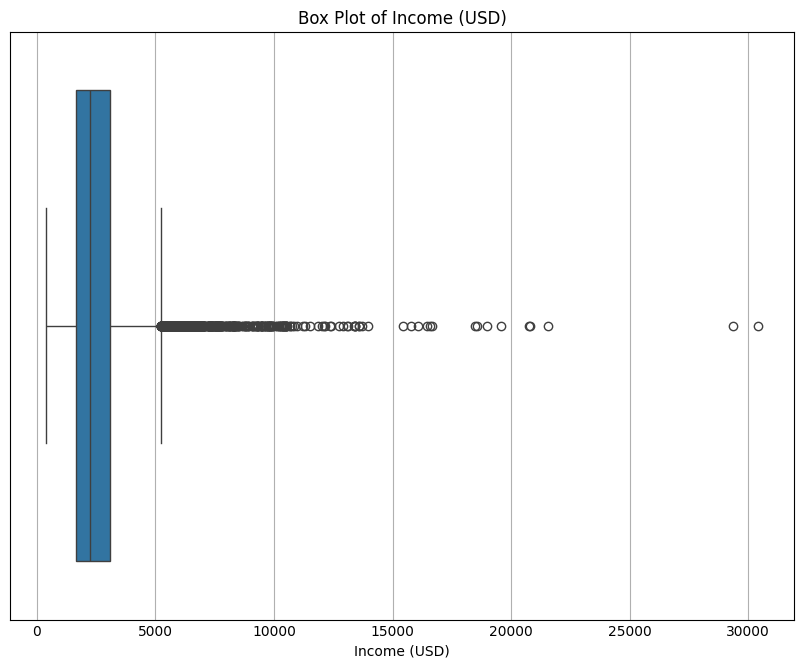

In [ ]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income (USD)'])
plt.title('Box Plot of Income (USD)')
plt.show()

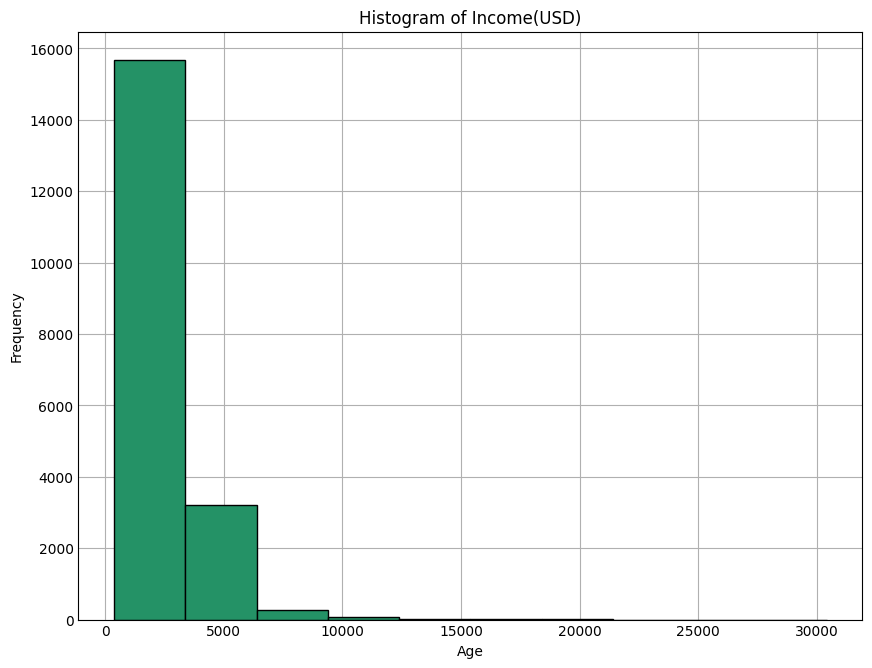

In [ ]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Income (USD)'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Income(USD)')
plt.show()

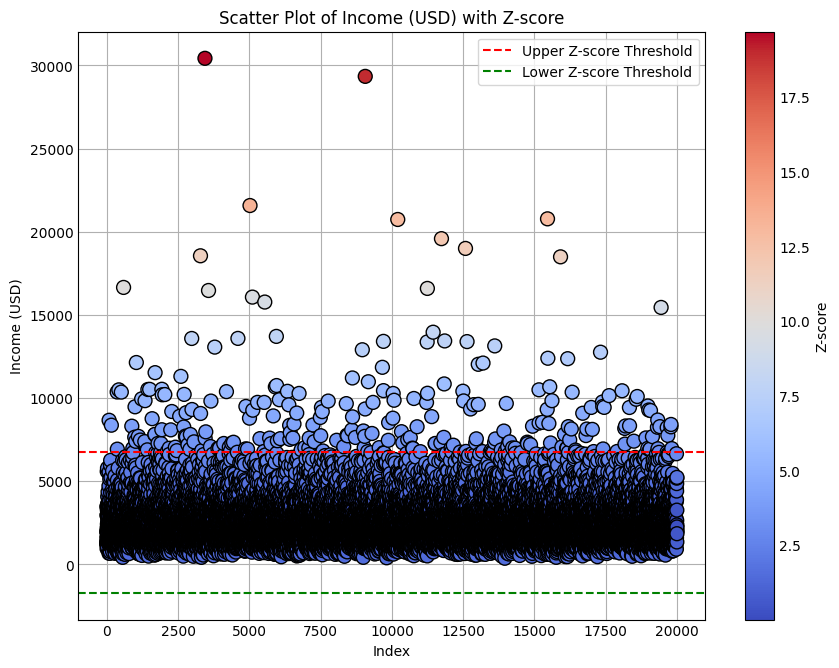

In [ ]:
# Calculate Z-score
df['Income_zscore'] = np.abs((df['Income (USD)'] - df['Income (USD)'].mean()) / df['Income (USD)'].std())

# Scatter plot with Z-score threshold
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Income (USD)'], c=df['Income_zscore'], cmap='coolwarm', edgecolor='k', s=100)
plt.axhline(y=df['Income (USD)'].mean() + 3 * df['Income (USD)'].std(), color='r', linestyle='--', label='Upper Z-score Threshold')
plt.axhline(y=df['Income (USD)'].mean() - 3 * df['Income (USD)'].std(), color='g', linestyle='--', label='Lower Z-score Threshold')
plt.colorbar(label='Z-score')
plt.xlabel('Index')
plt.ylabel('Income (USD)')
plt.title('Scatter Plot of Income (USD) with Z-score')
plt.legend()
plt.show()

In [ ]:
# Calculate Z-score
df['Income_zscore'] = (df['Income (USD)'] - df['Income (USD)'].mean()) / df['Income (USD)'].std()
# Define a threshold for outliers
threshold = 3

# Filter the DataFrame to remove outliers
df_no_outliers = df[np.abs(df['Income_zscore']) < threshold]

# Drop the Z-score column as it's no longer needed
df_no_outliers = df_no_outliers.drop(columns=['Income_zscore'])

print("Original DataFrame:")
print(df)

print("\nDataFrame after removing outliers using Z-score:")
print(df_no_outliers)

Original DataFrame:
      Customer ID              Name Gender  Age  Income (USD)  \
0         C-26247  Tandra Olszewski      F   47       3472.69   
1         C-35067     Jeannette Cha      F   57       1184.84   
2         C-34590      Keva Godfrey      F   52       1266.27   
3         C-16668      Elva Sackett      M   65       1369.72   
4         C-12196    Sade Constable      F   60       1939.23   
...           ...               ...    ...  ...           ...   
19995      C-9076    Tobias Davilla      F   19       1349.60   
19996     C-17587    Evelina Hodges      M   22       2019.78   
19997     C-46479   Karlyn Mckinzie      M   19       2252.03   
19998      C-3099    Mariana Pulver      F   21       1845.35   
19999     C-43482   Mechelle Boddie      M   21       5233.16   

      Income Stability            Profession Type of Employment    Location  \
0                  Low  Commercial associate           Managers  Semi-Urban   
1                  Low               Work

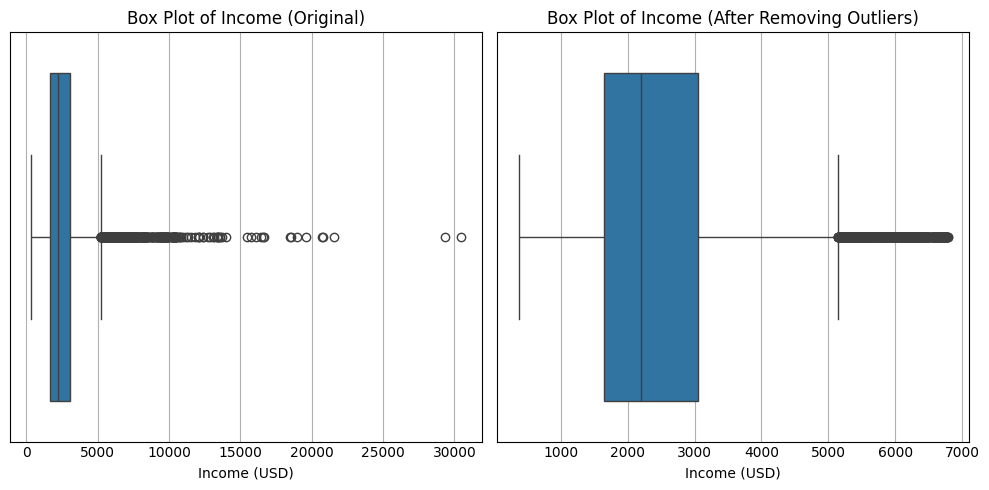

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Income (USD)'])
plt.title('Box Plot of Income (Original)')

# Creating a box plot for the DataFrame after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers['Income (USD)'])
plt.title('Box Plot of Income (After Removing Outliers)')

plt.tight_layout()
plt.show()

In [ ]:
# Check for missing values in the Customer ID column
missing_Income = data['Income (USD)'].isnull().sum()

if missing_Income > 0:
    print(f'There are {missing_Income} missing Income.')
else:
    print('There are no missing Income values.')

There are 750 missing Income.


In [ ]:
# Calculate skewness for the Income (USD) column
income_skewness = data['Income (USD)'].skew()
print(f'Skewness of the Income (USD) column: {income_skewness}')

Skewness of the Income (USD) column: 3.4098204952914632


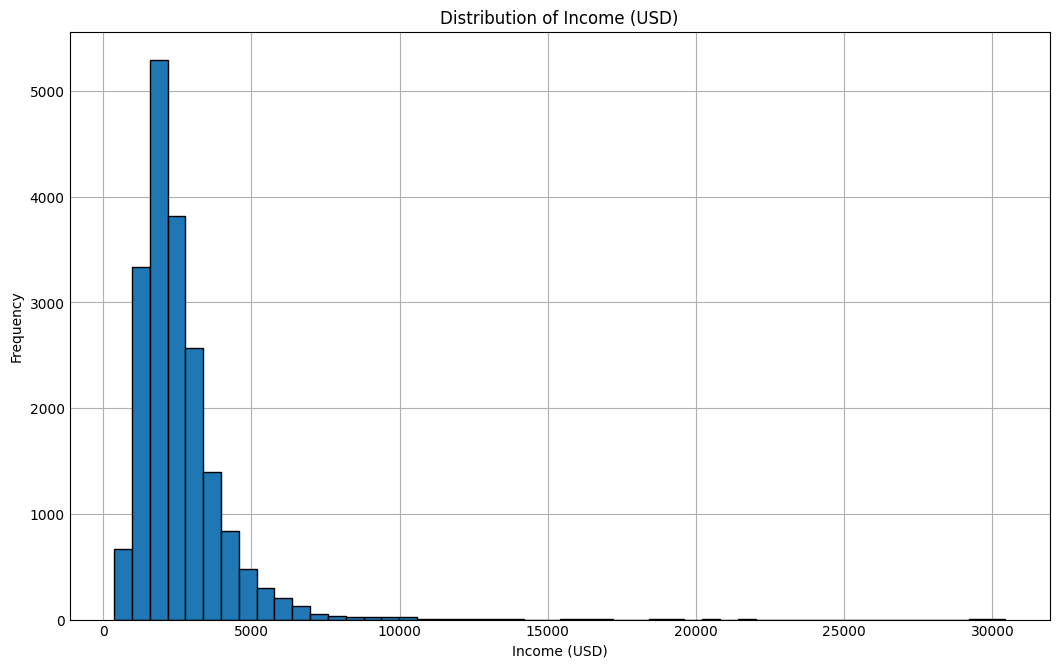

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for the Income (USD) column
plt.figure(figsize=(10, 6))
plt.hist(data['Income (USD)'].dropna(), bins=50, edgecolor='k')
plt.title('Distribution of Income (USD)')
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
pip install matplotlib seaborn


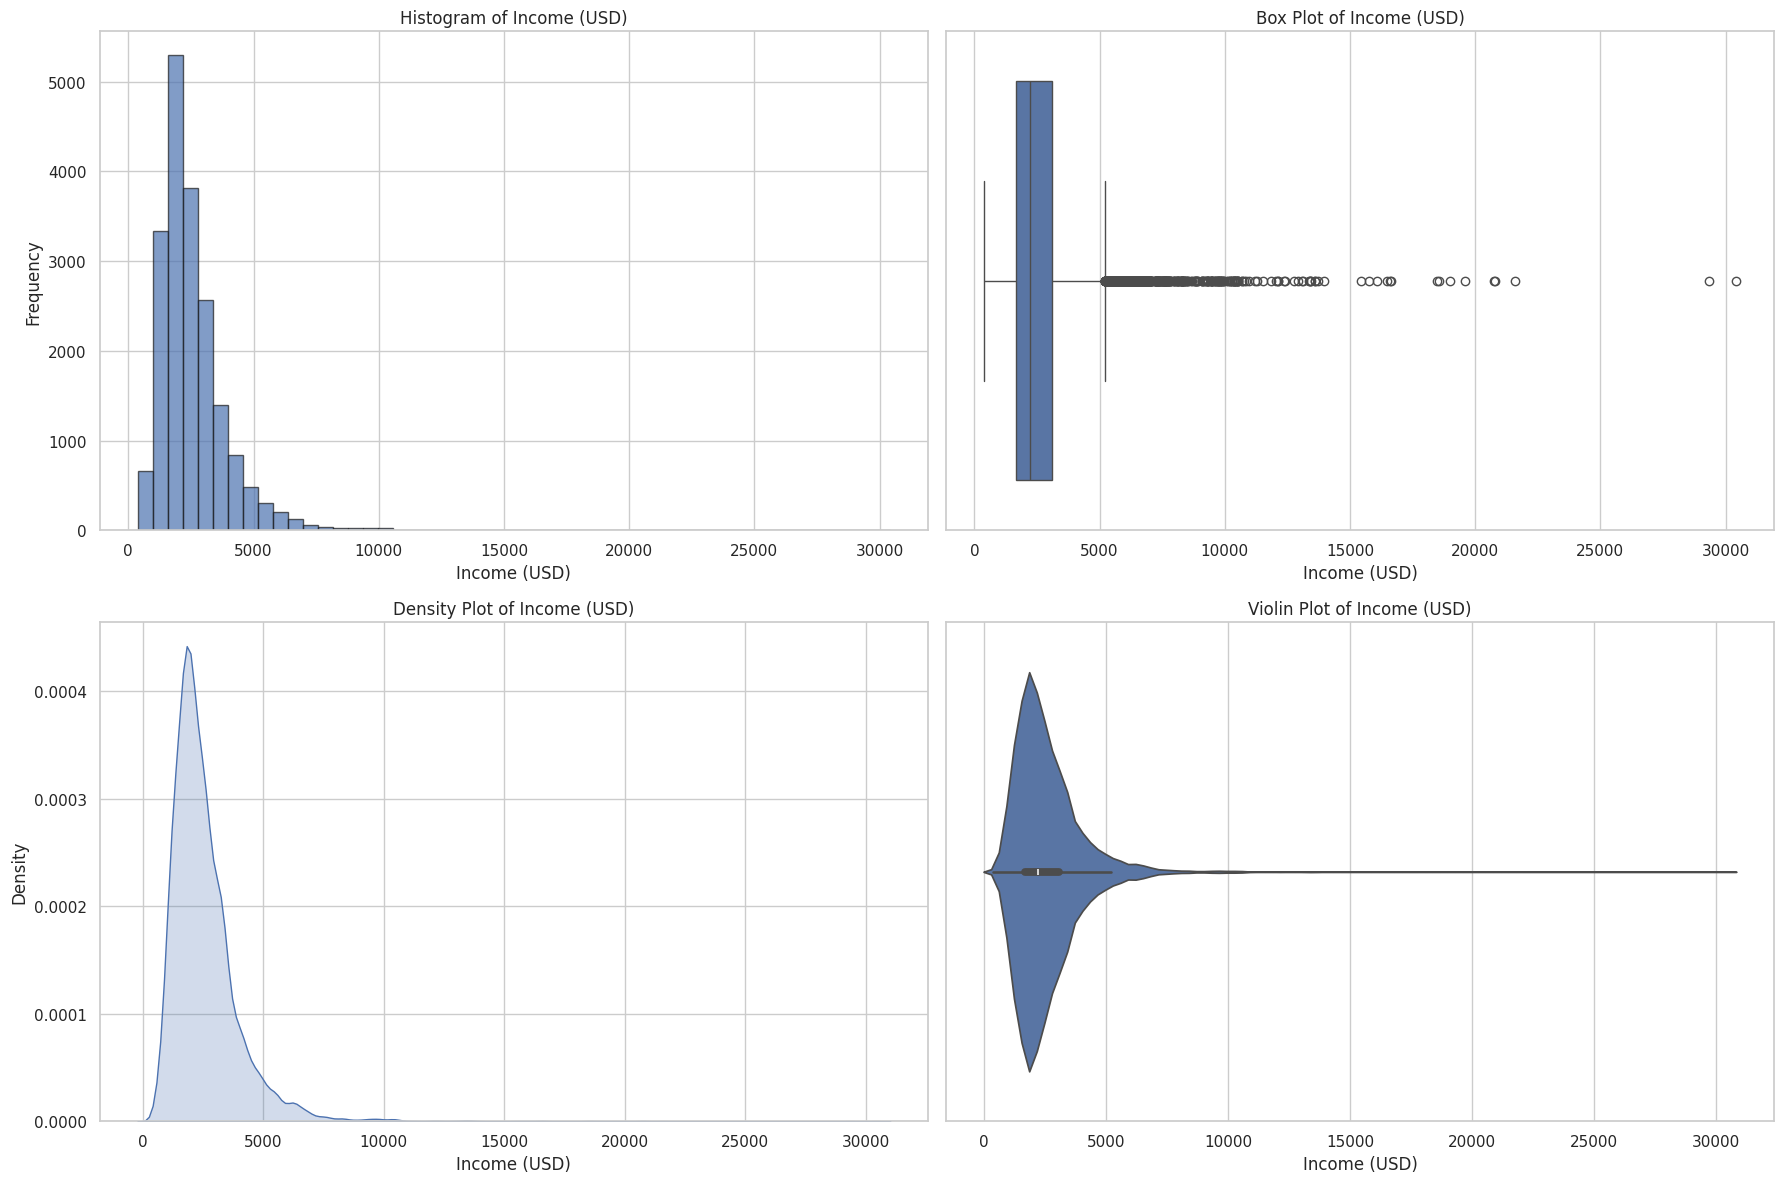

In [ ]:
# Drop NA values for visualizations to avoid errors
income_data = data['Income (USD)'].dropna()

# Set the style of the visualizations
sns.set(style="whitegrid")

# Create a figure with multiple subplots
plt.figure(figsize=(18, 12))

# Histogram
plt.subplot(2, 2, 1)
plt.hist(income_data, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Income (USD)')
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(2, 2, 2)
sns.boxplot(x=income_data)
plt.title('Box Plot of Income (USD)')
plt.xlabel('Income (USD)')

# Density Plot
plt.subplot(2, 2, 3)
sns.kdeplot(income_data, shade=True)
plt.title('Density Plot of Income (USD)')
plt.xlabel('Income (USD)')
plt.ylabel('Density')

# Violin Plot
plt.subplot(2, 2, 4)
sns.violinplot(x=income_data)
plt.title('Violin Plot of Income (USD)')
plt.xlabel('Income (USD)')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# Impute missing income values using the median
median_income = data['Income (USD)'].median()
data['Income (USD)'].fillna(median_income, inplace=True)

# Verify that there are no missing values in the Income column
missing_income_values = data['Income (USD)'].isnull().sum()
print(f'Number of missing values in the Income column after median imputation: {missing_income_values}')

Number of missing values in the Income column after median imputation: 0


In [ ]:
# Calculate the mean for the Income (USD) column
mean_income = data['Income (USD)'].mean()

# Impute missing income values using the mean
data['Income (USD)'].fillna(mean_income, inplace=True)

# Verify that there are no missing values in the Income column
missing_income_values = data['Income (USD)'].isnull().sum()
print(f'Number of missing values in the Income column after mean imputation: {missing_income_values}')

Number of missing values in the Income column after mean imputation: 0


In [ ]:
null_values = df['Income Stability'].isnull().sum()
print(f"Number of missing values in 'Income Stability' column: {null_values}")

Number of missing values in 'Income Stability' column: 813


In [ ]:
# Get unique values and their counts in the Age column
unique_income_stability = data['Income Stability'].value_counts(dropna=False)
# Print the number of unique values
num_unique_income_stability = unique_income_stability.size
print(f'There are {num_unique_income_stability} unique values in the income stability column.')

There are 3 unique values in the income stability column.


In [ ]:
# Print the counts of each unique value
print('Counts of each unique value in the income stability column:')
print(unique_income_stability)

Counts of each unique value in the income stability column:
Income Stability
Low     17501
High     1686
NaN       813
Name: count, dtype: int64


In [ ]:

# Check the distribution of values in the column
value_counts = data['Income Stability'].value_counts(dropna=False)
print("Value counts before imputation:")
print(value_counts)

# Calculate the mode of the column (most frequent value)
mode_value = data['Income Stability'].mode()[0]
print(f"The mode (most frequent value) of the 'Income Stability' column is: {mode_value}")

# Impute the missing values with the mode
data['Income Stability'].fillna(mode_value, inplace=True)

# Check the distribution of values after imputation
value_counts_after_imputation = data['Income Stability'].value_counts(dropna=False)
print("\nValue counts after imputation:")
print(value_counts_after_imputation)


Value counts before imputation:
Income Stability
Low     17501
High     1686
NaN       813
Name: count, dtype: int64
The mode (most frequent value) of the 'Income Stability' column is: Low

Value counts after imputation:
Income Stability
Low     18314
High     1686
Name: count, dtype: int64


In [ ]:
# 95% of the time low and "high" only 5%
# Calculate proportions
low_proportion = (data['Income Stability'] == 'low').sum() / data['Income Stability'].notna().sum()
high_proportion = (data['Income Stability'] == 'high').sum() / data['Income Stability'].notna().sum()

# Randomly assign missing values based on the proportion
def impute_proportionally(value):
    if pd.isna(value):
        return np.random.choice(['low', 'high'], p=[low_proportion, high_proportion])
    else:
        return value

data['Income Stability'] = data['Income Stability'].apply(impute_proportionally)

# Verify the distribution after proportional imputation
value_counts_after_proportional_imputation = data['Income Stability'].value_counts(dropna=False)
print("\nValue counts after proportional imputation:")
print(value_counts_after_proportional_imputation)


Value counts after proportional imputation:
Income Stability
Low     18314
High     1686
Name: count, dtype: int64


In [ ]:
!pip install pandas-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=ab5a2e9963fdeeea47393613b308f0df622dc70bfe8618292762e6f92d8fb82a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas_profiling


In [ ]:
from pathlib import Path

def load_config(config_file):
    if config_file is None:
        raise ValueError("config_file cannot be None")
    # Proceed with loading the configuration
    # Example: read the file content or parse it

# Example usage
config_path = "/content/Loan 1.csv"  # or Path("path/to/config/file")

# Ensure config_path is not None before calling load_config
load_config(config_path)



In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
# Define a colormap
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

In [ ]:
df = pd.DataFrame(data)

# Preprocessing
# Convert categorical variables to numeric using one-hot encoding or label encoding
df_encoded = pd.get_dummies(df, columns=[
    'Gender', 'Profession', 'Type of Employment', 'Location',
    'Property Type', 'Property Location', 'Has Active Credit Card', 'Co-Applicant'
])

# Drop non-numeric columns that don't make sense for correlation analysis
df_encoded = df_encoded.drop(columns=['Customer ID', 'Name', 'Property ID'])

# Ensure all columns are numeric
print("Columns and their types:")
print(df_encoded.dtypes)

# Calculate Pearson correlation
pearson_corr = df_encoded.corr(method='pearson')

# Calculate Spearman correlation
spearman_corr = df_encoded.corr(method='spearman')

# Display the correlation matrices
print("Pearson Correlation Matrix:")
print(pearson_corr)

print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Pearson correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

# Spearman correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

Columns and their types:
Age                                           int64
Income (USD)                                float64
Income Stability                             object
Loan Amount Request (USD)                   float64
Current Loan Expenses (USD)                 float64
Expense Type 1                               object
Expense Type 2                               object
Dependents                                  float64
Credit Score                                float64
No. of Defaults                               int64
Property Age                                float64
Property Price                               object
Gender_F                                       bool
Gender_M                                       bool
Profession_Commercial associate                bool
Profession_Maternity leave                     bool
Profession_Pensioner                           bool
Profession_State servant                       bool
Profession_Student                     

ValueError: could not convert string to float: 'Low'